## EDA


#### Frequency of Reviews By Rating


<ipython-input-9-be9f79fed309>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Score', data=train_data, palette=palette)


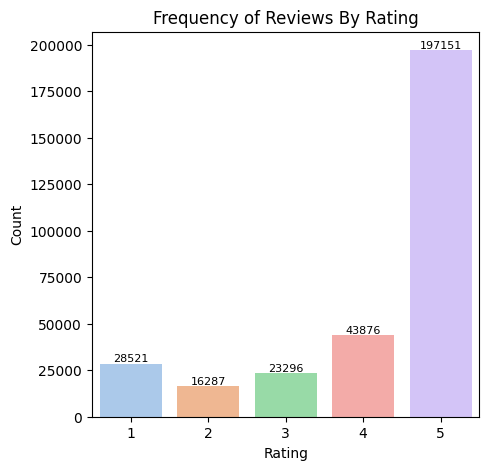

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Visualize the distribution of ratings
plt.figure(figsize=(5, 5))
# Define a pastel palette that increases in hue from 1 to 5
palette = sns.color_palette("pastel", n_colors=5)

# Plot the count plot with the specified palette
ax = sns.countplot(x='Score', data=train_data, palette=palette)
plt.title('Frequency of Reviews By Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

# Get the current plot axes
ax = plt.gca()

# Loop through each patch (bar in the barplot) to get its position and height and put the text (count)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=8, color='black', ha='center', va='bottom')

plt.show()

#### Exploring the dataset


In [ ]:
print(train_data.head())

   Score                                               Text
0      5  I received this product early from the seller!...
1      5  *****<br />Numi's Collection Assortment Melang...
2      5  I was very careful not to overcook this pasta,...
3      5  Buying this multi-pack I was misled by the pic...
4      5  These bars are so good! I loved them warmed up...


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309131 entries, 0 to 309130
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   309131 non-null  int64 
 1   Text    309131 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.7+ MB
None


In [ ]:
print(train_data.describe())

               Score
count  309131.000000
mean        4.180241
std         1.312151
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


In [ ]:
#Average word count by Rating

import pandas as pd



# Calculate word count for each review(Text)
train_data['word_count'] = train_data['Text'].apply(lambda x: len(str(x).split()))

# Group by 'Rating' and calculate the average word count
average_word_count_by_rating = train_data.groupby('Score')['word_count'].mean()


print("Average Word Count by Rating:")
print(average_word_count_by_rating)

Average Word Count by Rating:
Score
1    82.733354
2    90.140971
3    95.951322
4    91.860265
5    73.859788
Name: word_count, dtype: float64



### Correlation Between Word Count and Rating Of Reviews

Average Word Count by Rating:
   Score  word_count
0      1   82.733354
1      2   90.140971
2      3   95.951322
3      4   91.860265
4      5   73.859788


<ipython-input-14-49b21710647a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Score', y='word_count', data=average_word_count_by_rating, palette=palette)


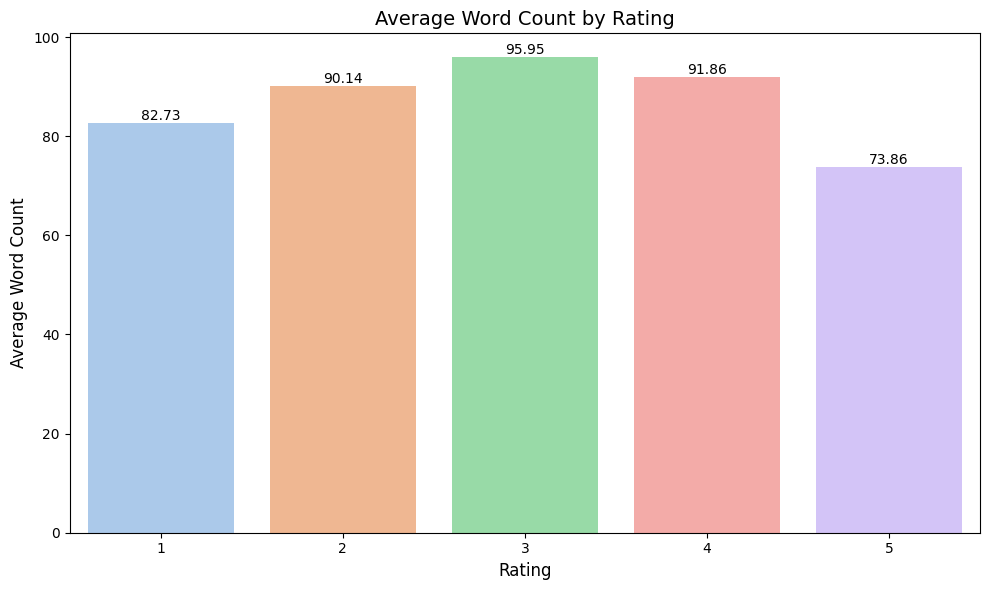

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is already defined and loaded

# Calculate word count for each review(Text)
train_data['word_count'] = train_data['Text'].apply(lambda x: len(str(x).split()))

# Group by Rating and calculate the average word count
average_word_count_by_rating = train_data.groupby('Score')['word_count'].mean().reset_index()
print("Average Word Count by Rating:")
print(average_word_count_by_rating)


# Setting up the plot
plt.figure(figsize=(10, 6))  # Smaller graph size
palette = sns.color_palette("pastel", n_colors=len(average_word_count_by_rating['Score']))

# Creating the bar plot
barplot = sns.barplot(x='Score', y='word_count', data=average_word_count_by_rating, palette=palette)

# Adding the text labels above the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     size = 10,
                     xytext = (0, 5),
                     textcoords = 'offset points')

# Setting the title and labels
plt.title('Average Word Count by Rating', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Average Word Count', fontsize=12)

plt.tight_layout()
plt.show()

This shows that the average word count for rating 5 is less than the average word count for rating 1 to 4, suggesting that the rating of 5 is more precise averaging approx 74 words.

In [ ]:
# Calculate word count for each review
train_data['word_count'] = train_data['Text'].apply(lambda x: len(str(x).split()))

# Get distribution of word counts by rating
distribution_by_rating = train_data.groupby('Score')['word_count'].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

# Print the desired statistics
print(distribution_by_rating[['count', 'mean', 'std', 'min', '25%', '50%', '75%', '95%', 'max']])

          count       mean        std  min   25%   50%    75%    95%     max
Score                                                                       
1       28521.0  82.733354  76.646718  3.0  37.0  61.0  101.0  214.0  1751.0
2       16287.0  90.140971  79.779993  6.0  40.0  67.0  112.0  233.0  1612.0
3       23296.0  95.951322  89.100127  7.0  41.0  70.0  121.0  255.0  3432.0
4       43876.0  91.860265  87.705394  6.0  37.0  65.0  115.0  249.0  2061.0
5      197151.0  73.859788  72.045997  3.0  32.0  52.0   89.0  198.0  2520.0


### Checking Anomalies

In [ ]:
import re
import nltk # no. to text coversion
import inflect
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup  # for HTML tag removal


# Function to check if a review contains only stop words
def contains_only_stopwords(text, stopwords):
    words = re.findall(r'\b\w+\b', str(text).lower())
    return all(word in stopwords for word in words)

# Function to check if a review contains only special characters
def contains_only_special_chars(text):
    return bool(re.match(r'^[\W_]+$', str(text)))

# Function to check if a review contains only digits
def contains_only_digits(text):
    return bool(re.match(r'^\d+$', str(text)))

# Function to check if a review is empty or filled with white spaces
def is_empty_or_space(text):
    return str(text).isspace() or not str(text)

# Function to check if a review contains HTML tags or URLs
def contains_html_or_url(text):
    return bool(re.findall(r'<[^>]+>', str(text))) or bool(re.findall(r'http\S+|www.\S+', str(text)))

def contains_only_html_or_url(text):
    # Check if text contains only HTML tags
    if bool(re.fullmatch(r'(<[^>]+>)+', str(text))):
        return True
    # Check if text is just a URL
    if bool(re.fullmatch(r'http\S+|www.\S+', str(text))):
        return True
    return False



stop_words_set = set(nltk.corpus.stopwords.words('english'))

# Count various anomalies in the data
missing_data_count = train_data['Text'].isnull().sum()
blanks_count = train_data['Text'].apply(is_empty_or_space).sum()
only_stop_words_count = train_data['Text'].apply(lambda x: contains_only_stopwords(x, stop_words_set)).sum()
only_special_chars_count = train_data['Text'].apply(contains_only_special_chars).sum()
only_digits_count = train_data['Text'].apply(contains_only_digits).sum()
html_or_url_count = train_data['Text'].apply(contains_html_or_url).sum()
only_html_or_url_count = train_data['Text'].apply(contains_only_html_or_url).sum()

asterisk_reviews_count = train_data['Text'].apply(lambda x: '*' in str(x)).sum()

print("Checking Data Anomalies.")
print("Reviews with Missing Data/ Nulls:", missing_data_count)
print("Reviews with Blanks/ Empty Spaces:", blanks_count)
print("Reviews with Only Stop Words:", only_stop_words_count)
print("Reviews with Only Special Characters:", only_special_chars_count)
print("Reviews with Only Digits:", only_digits_count)
print("Reviews with HTML Code/ URL within text:", html_or_url_count)
print("Reviews with only HTML Code/ URL:", only_html_or_url_count)
print("Reviews with containing '*':", asterisk_reviews_count)
print("-----------------------")


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Trial Preprocessing  No 1

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

class TextPreprocessor:
    def __init__(self, en_nlp=None):
        # Download NLTK resources
        nltk.download('punkt', quiet=True)
        nltk.download('stopwords', quiet=True)
        # Initialize stemmer and stopwords
        self.stemmer = PorterStemmer()
        self.stop_words = set(stopwords.words('english'))
        self.en_nlp = en_nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess_text(text) for text in X]

    def preprocess_text(self, text):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Tokenize
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [token for token in tokens if token not in self.stop_words]
        # Apply stemming
        tokens = [self.stemmer.stem(token) for token in tokens]
        # Join tokens back into text
        return ' '.join(tokens)

# Create preprocessor instance
preprocessor = TextPreprocessor()

# Apply to dataframe
train_data['Preprocessed_Review'] = train_data['Text'].apply(preprocessor.preprocess_text)

print("Original vs Preprocessed text:")
print(train_data[['Text', 'Preprocessed_Review']].head())

Original vs Preprocessed text:
                                                Text  \
0  I received this product early from the seller!...   
1  *****<br />Numi's Collection Assortment Melang...   
2  I was very careful not to overcook this pasta,...   
3  Buying this multi-pack I was misled by the pic...   
4  These bars are so good! I loved them warmed up...   

                                 Preprocessed_Review  
0  receiv product earli seller tastey great midda...  
1  br numi collect assort melang includesbr herba...  
2  care overcook pasta make sure take bite everi ...  
3  buy multipack misl pictur whole hazel nut anot...  
4  bar good love warm definit think great snack b...  


### Trial Preprocessing  No 2

The following steps have been applied in the pre-processing.<br/>
<ul>
    <li>Removal of URL and HTML tags</li>
    <li>Coversion of text to lower case</li>
    <li>Conversion of numbers to text</li>
    <li>Handling of special words like A++ and A*</li>
    <li>Handling contraction</li>
    <li>Stop words removal except negation words</li>
    <li>Conversion of emoticons to text</li>
    <li>Removal of special characters except + and * </li>
    <li>Expanding contractions for specific terms</li>
    <li>Excluding reviews which has only stop words</li>
</ul>

In [ ]:
import re
import nltk # no. to text coversion
import inflect
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup  # for HTML tag removal

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

class TextPreprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, remove_urls=True, handle_contractions=True):
        self.remove_urls = remove_urls
        self.handle_contractions = handle_contractions
        self.stop_words = set(stopwords.words('english'))
        self.stop_words.difference_update(['no', 'not', "don't", 'never', 'none', 'neither', 'nor'])
        self.lemmatizer = WordNetLemmatizer()
        self.inflect_engine = inflect.engine()
        self.emoticon_dict = {
            ':)': 'smile',
            ':(': 'sad',
            ':D': 'happy',
            ':d': 'happy',
            ':P': 'playful',
            ':/': 'confused',
            ':|': 'neutral',
            ';)': 'wink',
            ':*': 'kiss',
            '<3': 'heart',
            ':O': 'surprised',
            ':@': 'angry',
            ':S': 'unsure',
            ':*(': 'crying',
            'XD': 'laughing',
            ':>': 'skeptical',
            ':3': 'cute',
            ':v': 'pacman',
            '>:(': 'angry',
            ':v': 'happy',
            ':poop:': 'poop',
            ':rofl:': 'laughing',
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_texts = [self.preprocess_text_nltk(text) for text in X]
        return preprocessed_texts

    def preprocess_text_nltk(self, text):
        if not isinstance(text, str) or text.strip() == '':
            return ''

        # URL and HTML Tag removal
        if self.remove_urls:
            text = re.sub(r'http\S+|www.\S+', '', text)
        text = BeautifulSoup(text, "html.parser").get_text()


        # Convert numbers before further processing
        text = self.convert_numbers(text)


        # Normalize spaces around '+' and replace specific patterns/ handing special text within train data
        #text = re.sub(r'\s*\+\s*', '+', text)
        text = re.sub(r'A+\++', 'excellent', text)

        #Lowercase the text
        text = text.lower()

        # Handle contractions
        if self.handle_contractions:
            text = self.expand_contractions(text)

        # Convert emoticons to text
        for emoticon, description in self.emoticon_dict.items():
            text = text.replace(emoticon, description)





        # Convert * to "star"
        text = text.replace('*', ' star ')


        # Retain *, numbers and +
        cleaned_text = re.sub(r'[^a-zA-Z0-9\s\*\+]', '', text)
        tokens = word_tokenize(cleaned_text)


        # Lemmatization and selective stop word removal
        # Retain asterisks (*), plus signs (+), 'no', and 'not'
        filtered_tokens = [self.lemmatizer.lemmatize(word) for word in tokens if word not in self.stop_words or word in ['*', '+', 'no', 'not',"don't"]]

        # Check if the resulting list of tokens is empty (all stop words)
        if not filtered_tokens:
            # Return the cleaned text instead of joining the empty token list
            return text
        else:
            return ' '.join(filtered_tokens)



    def convert_numbers(self, text):
        # Find all numbers with optional decimal points in the text
        numbers = re.findall(r'\b\d+(?:\.\d+)?', text)

        for number in numbers:
            word_form = self.inflect_engine.number_to_words(number)
            text = text.replace(number, word_form)

        return text


    def expand_contractions(self, text):
        # Define contraction mapping
        contractions = {
            "ain't": "am not",
            "aren't": "are not",
            "can't": "can not",
            "'cause": "because",
            "coz": "because",
            "cause": "because",
            "could've": "could have",
            "couldn't": "could not",
            "didn't": "did not",
            "doesn't": "does not",
            "don't": "do not"
        }
        # Replace contractions with their expansions
        for contraction, expansion in contractions.items():
            text = text.replace(contraction, expansion)
        return text


############################################################
text_preprocessor = TextPreprocessor(remove_urls=True,handle_contractions=True)

# Preprocess the 'Review' column
preprocessed_train_reviews = text_preprocessor.transform(train_data['Text'])
preprocessed_test_reviews = text_preprocessor.transform(test_data['Text'])


# Create a new DataFrame with preprocessed reviews and the original overall ratings
processed_train_data = pd.DataFrame({
    'Original_Review': train_data['Text'],
    'Preprocessed_Review': preprocessed_train_reviews,
    'Overall': train_data['Score']
})



processed_test_data= pd.DataFrame({
    'id': test_data['Id'],
    'Original_Review': test_data['Text'],
    'Preprocessed_Review': preprocessed_test_reviews
})



# Save the combined data to a new CSV file
processed_train_data.to_csv("processed_train_data_final_smt_pp.csv", index=False)
processed_test_data.to_csv("processed_test_data_final_smt_pp.csv", index=False)

processed_test_data.info()
processed_train_data.info()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119662 entries, 0 to 119661
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   119662 non-null  int64 
 1   Original_Review      119662 non-null  object
 2   Preprocessed_Review  119662 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309131 entries, 0 to 309130
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Original_Review      309131 non-null  object
 1   Preprocessed_Review  309131 non-null  object
 2   Overall              309131 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.1+ MB


### Running Count Vectorizer and TFIDF on 6 different classifiers:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB  # Added import
from sklearn.linear_model import LogisticRegression  # Added import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from gensim.models import KeyedVectors
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np


# Load preprocessed data
pre_trim_data_t4 = pd.read_csv(r"processed_train_data_final_t4.csv")

# Fill missing values with empty strings
pre_trim_data_t4['Preprocessed_Review'].fillna('', inplace=True)


# Split the data into features (X) and target (y)
X = pre_trim_data_t4['Preprocessed_Review']
y = pre_trim_data_t4['Overall']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a function to train, evaluate, and compute confusion matrix
def train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test):
    # Vectorize the text
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Experiment with different vectorizers and classifiers
vectorizers_v3 = [CountVectorizer(), TfidfVectorizer()]
classifiers_v3 = [MultinomialNB(), LogisticRegression(max_iter=1000)]

for vectorizer in vectorizers_v3:
    for classifier in classifiers_v3:
        print(f"Using {vectorizer.__class__.__name__} with {classifier.__class__.__name__}:")
        # Train and evaluate with the review data
        report, cm = train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test)
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", cm)


<ipython-input-11-e3be3c77048e>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pre_trim_data_t4['Preprocessed_Review'].fillna('', inplace=True)


Using CountVectorizer with MultinomialNB:
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.57      0.58      5644
           2       0.25      0.01      0.03      3214
           3       0.34      0.10      0.15      4679
           4       0.35      0.26      0.30      8688
           5       0.76      0.93      0.84     39602

    accuracy                           0.69     61827
   macro avg       0.46      0.37      0.38     61827
weighted avg       0.63      0.69      0.64     61827

Confusion Matrix:
 [[ 3219    71   204   308  1842]
 [  785    47   352   526  1504]
 [  525    36   454  1287  2377]
 [  312    13   186  2218  5959]
 [  623    22   140  1955 36862]]
Using CountVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.61      0.61      5644
           2       0.30      0.19      0.23      3214
           3       0.34   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.01      0.02      5644
           2       0.00      0.00      0.00      3214
           3       0.00      0.00      0.00      4679
           4       0.40      0.00      0.00      8688
           5       0.64      1.00      0.78     39602

    accuracy                           0.64     61827
   macro avg       0.39      0.20      0.16     61827
weighted avg       0.55      0.64      0.50     61827

Confusion Matrix:
 [[   50     0     0     0  5594]
 [    4     0     0     0  3210]
 [    0     0     0     0  4679]
 [    1     0     0     2  8685]
 [    0     0     0     3 39599]]
Using TfidfVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.64      0.64      5644
           2       0.35      0.13      0.19      3214
           3       0.39      0.23      0.29      4679
           4  

### Table comparison:

In [ ]:
# Create the dataframe for accuracy scores of all 6 classifiers
df_accuracy = pd.DataFrame([
    ['69%', '64%'],
    ['71%', '72%'],
    ['60%', '59%'],
    ['68%', '68%'],
    ['64%', '64%'],
    ['63%', '63%']
], index=pd.Index(['MultinomialNB', 'Logistic Regression', 'DecisionTreeClassifier', 'GradientBoostingClassifier', 'AdaBoostClassifier', 'KNeighborsClassifier']),
   columns=pd.MultiIndex.from_product([['CountVectorizer', 'TFIDF']]))
df_accuracy.style


s_accuracy = df_accuracy.style
# s_f1 = df_f1.style
# Add table styles
cell_hover = {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]}
index_names = {'selector': '.index_name', 'props': 'font-style: italic; color: darkgrey; font-weight: normal;'}
headers = {'selector': 'th:not(.index_name)', 'props': 'background-color: #000066; color: white; text-align: center'}
s_accuracy.set_table_styles([cell_hover, index_names, headers])
s_accuracy.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row1.col0',  'props': 'background-color: green; color: white'},
    {'selector': 'td.row1.col1',  'props': 'background-color: green; color: white'},
], overwrite=False)
s_accuracy.set_caption("Comparison of classifiers performance - Accuracy") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: black; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)

# s_accuracy.format('{:.2f}')

,"('CountVectorizer',)","('TFIDF',)"
MultinomialNB,69%,64%
Logistic Regression,71%,72%
DecisionTreeClassifier,60%,59%
GradientBoostingClassifier,68%,68%
AdaBoostClassifier,64%,64%
KNeighborsClassifier,63%,63%


Since <b>Logistic Regression</b> performed the best, we will explore other vectorizer techniques such as <b>count vectorizer with n-grams. TFIDF with n-grams, fastText vectorizer and HashingVectorizer</b> on <b>Logistic Regression</b>.

## HashingVectorizer with Logistic regression:


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Fill missing values with empty strings
train_data['Preprocessed_Review'].fillna('', inplace=True)

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train, evaluate, and compute confusion matrix
def train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test):
    # Vectorize the text
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Experiment with different vectorizers and classifiers
vectorizers_v2 = [HashingVectorizer()]
classifiers_v2 = [LogisticRegression(max_iter=1000)]

for vectorizer in vectorizers_v2:
    for classifier in classifiers_v2:
        print(f"Using {vectorizer.__class__.__name__} with {classifier.__class__.__name__}:")
        # Train and evaluate with the truncated review data
        report, cm = train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test)
        print("Classification Report:\n", report)
        print("Confusion Matrix:\n", cm)


<ipython-input-4-fe7aa8165f73>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Preprocessed_Review'].fillna('', inplace=True)


Using HashingVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.63      0.64      0.63      5644
           2       0.36      0.11      0.17      3214
           3       0.39      0.23      0.29      4679
           4       0.45      0.20      0.28      8688
           5       0.78      0.95      0.86     39602

    accuracy                           0.72     61827
   macro avg       0.52      0.43      0.45     61827
weighted avg       0.67      0.72      0.68     61827

Confusion Matrix:
 [[ 3584   260   267   116  1417]
 [  882   368   572   193  1199]
 [  513   246  1090   773  2057]
 [  226    75   557  1735  6095]
 [  504    72   280  1007 37739]]


### FastText Vectorizer with Logistic regression:

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip


--2025-04-04 10:49:04--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.51, 18.173.166.74, 18.173.166.48, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  36.4MB/s    in 9.1s    

2025-04-04 10:49:13 (71.6 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class FastTextVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, ft_model):
        self.ft_model = ft_model
        self.vector_size = ft_model.vector_size

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.transform_text(text) for text in X])

    def transform_text(self, text):
        words = text.split()
        vectors = [self.ft_model[word] for word in words if word in self.ft_model]
        if vectors:
            return np.mean(vectors, axis=0)
        else:
            return np.zeros(self.vector_size)


# Load the FastText model with a limit
ft_model = KeyedVectors.load_word2vec_format("wiki-news-300d-1M.vec")

# Fill missing values with empty strings
train_data['Preprocessed_Review'].fillna('', inplace=True)

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train, evaluate, and compute confusion matrix
def train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test):
    # Vectorize the text
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)

    # Evaluate the classifier
    y_pred = classifier.predict(X_test_vectorized)
    report = classification_report(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    return report, cm

# Experiment with FastTextVectorizer and Logistic Regression classifier
vectorizer = FastTextVectorizer(ft_model)
classifier = LogisticRegression(max_iter=1000)

print(f"Using FastTextVectorizer with {classifier.__class__.__name__}:")
# Train and evaluate with the truncated review data
report, cm = train_evaluate_confusion_matrix(vectorizer, classifier, X_train, X_test, y_train, y_test)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


Using FastTextVectorizer with LogisticRegression:
Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.43      0.47      5644
           2       0.33      0.03      0.05      3214
           3       0.32      0.09      0.14      4679
           4       0.38      0.06      0.10      8688
           5       0.70      0.96      0.81     39602

    accuracy                           0.67     61827
   macro avg       0.45      0.31      0.32     61827
weighted avg       0.59      0.67      0.59     61827

Confusion Matrix:
 [[ 2399    64   149    54  2978]
 [  657    95   260    77  2125]
 [  468    62   429   286  3434]
 [  287    27   278   512  7584]
 [  728    36   215   429 38194]]


In [ ]:
# Create the dataframe for accuracy scores of two vectorizers
df_accuracy = pd.DataFrame([
    ['72%', '67%'],
], index=pd.Index(['Logistic Regression']),
   columns=pd.MultiIndex.from_product([['HashingVectorizer', 'FastText Vectorizer']]))
df_accuracy.style


s_accuracy = df_accuracy.style
#s_f1 = df_f1.style
# Add table styles
cell_hover = {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]}
index_names = {'selector': '.index_name', 'props': 'font-style: italic; color: darkgrey; font-weight: normal;'}
headers = {'selector': 'th:not(.index_name)', 'props': 'background-color: #000066; color: white; text-align: center'}
s_accuracy.set_table_styles([cell_hover, index_names, headers])
s_accuracy.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row0.col0',  'props': 'background-color: green; color: white'},
#     {'selector': 'td.row1.col1',  'props': 'background-color: green; color: white'},
], overwrite=False)
s_accuracy.set_caption("Comparison of HashingVectorizer and FastText Vectorizer using Logistic Regression") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: black; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)

# s_accuracy.format('{:.2f}')

,"('HashingVectorizer',)","('FastText Vectorizer',)"
Logistic Regression,72%,67%


# Part - 4: Model training, selection and hyperparameter tuning and evaluation:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from gensim.models import KeyedVectors
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from joblib import dump
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

import os

# Create directory for saving models
os.makedirs("./grid_search_models", exist_ok=True)


# Fill missing values with empty strings
train_data['Preprocessed_Review'] = train_data['Preprocessed_Review'].fillna('')

# Split the data into features (X) and target (y)
X = train_data['Preprocessed_Review']
y = train_data['Score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers with their associated parameters
classifiers = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.1, 0.5, 1.0],  # Smoothing parameter for MultinomialNB
    },

    {
        'classifier': [LogisticRegression(max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter for LogisticRegression
        'classifier__penalty': ['l1', 'l2'],  # Penalty term for LogisticRegression
    },
    {
        'classifier': [GradientBoostingClassifier()],
        'classifier__n_estimators': [50, 100, 200],  # The number of boosting stages to perform
        'classifier__max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    },

]
max_df_values = [0.2, 0.5, 1.0]
vectorizers = []
for max_df in max_df_values:
    vectorizers.extend([
        (CountVectorizer(ngram_range=(1, 1), max_df=max_df), f"CountVectorizer_Unigram_max_df_{max_df}"),
        (CountVectorizer(ngram_range=(1, 2), max_df=max_df), f"CountVectorizer_Bigram_max_df_{max_df}"),
        (CountVectorizer(ngram_range=(1, 3), max_df=max_df), f"CountVectorizer_Trigram_max_df_{max_df}"),
        (TfidfVectorizer(ngram_range=(1, 1), max_df=max_df), f"TfidfVectorizer_Unigram_max_df_{max_df}"),
        (TfidfVectorizer(ngram_range=(1, 2), max_df=max_df), f"TfidfVectorizer_Bigram_max_df_{max_df}"),
        (TfidfVectorizer(ngram_range=(1, 3), max_df=max_df), f"TfidfVectorizer_Trigram_max_df_{max_df}"),
    ])

# Create an empty list to store the results
results = []

# Perform grid search for each combination of classifier and vectorizer
for classifier_config in classifiers:
    for vectorizer, vectorizer_name in vectorizers:
        print("Classifier:", type(classifier_config['classifier'][0]).__name__)
        print("vectorizer", vectorizer_name)
        # Create a pipeline with the current vectorizer and classifier
        pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier_config['classifier']),
        ])

        # Create GridSearchCV object
        grid_search = GridSearchCV(pipeline, classifier_config, cv=2, scoring='accuracy', verbose=3)

        # Perform grid search
        grid_search.fit(X_train, y_train)

        # Save the best model
        best_model = grid_search.best_estimator_
        model_filename = f"./grid_search_models/{vectorizer_name}_{type(classifier_config['classifier'][0]).__name__}_best_model.joblib"
        dump(best_model, model_filename)

        # Get best parameters and best score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        test_score = grid_search.score(X_test, y_test)

        # Store the results
        result = {
            'vectorizer': vectorizer_name,
            'classifier': type(classifier_config['classifier'][0]).__name__,
            'best_params': best_params,
            'best_score': best_score,
            'test_score': test_score,
        }
        results.append(result)


# Print the results
for result in results:
    print("===================================================")
    print(f"Vectorizer: {result['vectorizer']}, Classifier: {result['classifier']}")
    print("Best parameters:", result['best_params'])
    print("Best cross-validation score:", result['best_score'])
    print("Test set accuracy:", result['test_score'])
    print()

    # Print classification report and confusion matrix
    print("Classification Report:")
    y_pred = result['best_model'].predict(X_test)
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("===================================================")


Classifier: LogisticRegression
vectorizer CountVectorizer_Unigram_max_df_0.2
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time=   4.9s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time=   4.3s
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.698 total time=  27.0s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.699 total time=  28.0s
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.1, classifier__penalty=l1;, score=nan total time=   4.0s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.1, classifier__penalty=l1;, score=nan total time=   5.9s
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), clas

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last

Classifier: LogisticRegression
vectorizer CountVectorizer_Bigram_max_df_0.2
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time=  19.7s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time=  19.0s
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.709 total time= 3.0min
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.709 total time= 3.1min
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.1, classifier__penalty=l1;, score=nan total time=  20.4s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.1, classifier__penalty=l1;, score=nan total time=  20.2s
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), class

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
8 fits failed out of a total of 16.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last

Classifier: LogisticRegression
vectorizer CountVectorizer_Trigram_max_df_0.2
Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time=  51.2s
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l1;, score=nan total time= 1.0min
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.709 total time= 8.8min
[CV 2/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.01, classifier__penalty=l2;, score=0.709 total time= 9.7min
[CV 1/2] END classifier=LogisticRegression(max_iter=1000), classifier__C=0.1, classifier__penalty=l1;, score=nan total time=  51.7s


KeyboardInterrupt: 